# Customer Segmentation Report for Arvato Financial Services

### Table of Contents:

1. **[Introduction](#1.)**


2. **[Get to Know the Data](#2.)**


3. **[Understand the Problem](#3.)**


4. **[ Import Libraries](#4.)**


5. **[Data Gathering](#5.)**

    - [5.1. Findings 1: Data Understanding](#5.1.)


6. **[Exploratory Data Analysis](#6.)**

    - [6.1. Ages Group Comparation](#6.1.)
    - [6.2. Findings 2: Compare Proportions based on Ages Group](#6.2.)
    - [6.3. Financial Type Comparation](#6.3.)
    - [6.4. Findings 3: Compare Proportions based on Financial Type](#6.4.)
    - [6.5. Income Distribution Comparation](#6.5.)
    - [6.6. Findings 4: Compare Proportions based on Income Distribution](#6.6.)


7. **[Data Preprocessing](#7.)**

    - [7.1. Data Cleaning](#7.1.)
    - [7.2. Principal Component Analysis](#7.2.)


8. **[Determining the optimal number of clusters](#8.)**


9. **[Apply clustering to general population](#9.)**


10. **[Findings 5: Cluster-Based Profiles | How Clusters Differ from Overall Dataset](#10.)**


11. **[Findings 6: Cluster Analysis | Comparing Customer and General Population Segment](#11.)**


12. **[Supervised Learning Model](#12.)**

    - [12.1. Random Forest](#12.1.)
    - [12.2. Logistic Regression](#12.2.)
    - [12.3. XGBoost](#12.3.)


13. **[Models Evaluation](#13.)**


14. **[Findings 7: ROC AUC and Accuracy Metrics Evaluation](#14.)**


15. **[Conclusions](#15.)**


16. **[Future Improvements](#16.)**


17. **[Technical Improvements](#17.)**


18. **[Closure](#18.)**


19. **[Acknowledgments](#19.)** 

### 1. Introduction <a name="1."></a>

In this project, we'll analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. Then, we use unsupervised learning techniques to perform customer segmentation, and identifying the parts of the population that best describe the core customer base of the company. Last, we'll use the informations for target marketing campaign, and use model to predict which individuals are most likely to become customers.

### 2. Get to Know the Data <a name="2."></a>

The data was provided by Bertelsmann Arvato Analytics. There are files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood.

We also can refer to spreadsheets provided in the workspace:
- `./DIAS Information Levels - Attributes 2017.xlsx` is a top-level list of attributes and descriptions, organized by informational category.
- `./DIAS Attributes - Values 2017.xlsx` is a detailed mapping of data values for each feature in alphabetical order.

**Note:** for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

### 3. Understand the Problem <a name="3."></a>

Here some business questions that I can listed:

- Q1: What to do to improve data quality for analysis and modeling?

- Q2: How age differences affect customers behaviour and business?

- Q3: Are financial behaviors affect marketing strategies?

- Q4: Do income differences have an impact to business strategies?

- Q5: Is there any unique cluster-based profile that can combine for decision support?

- Q6: Which goruped clusters can be a target marketing?

- Q7: What metric should we prioritize and how it has impact to business decisions?

By using data-driven approaches, hope we'll get valuable insights into Customer Segmentation Report for Arvato Financial Services. This project aim to help business make informed decisions, improve marketing strategies, and customer satisfaction.

### 4. Import Libraries <a name="4."></a>

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### 5. Data Gathering <a name="5."></a>

In [2]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Print the first five rows of the azdias DataFrame
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
# Print the first five rows of the customers DataFrame
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [5]:
# Display basic information about the datasets
azdias.info()

# Display summary statistics
azdias.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [6]:
# Display basic information about the datasets
customers.info()

# Display summary statistics
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(8)
memory usage: 539.5+ MB


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


In [7]:
# Check for missing values
print(azdias.isnull().sum())

LNR                                0
AGER_TYP                           0
AKT_DAT_KL                     73499
ALTER_HH                       73499
ALTER_KIND1                   810163
ALTER_KIND2                   861722
ALTER_KIND3                   885051
ALTER_KIND4                   890016
ALTERSKATEGORIE_FEIN          262947
ANZ_HAUSHALTE_AKTIV            93148
ANZ_HH_TITEL                   97008
ANZ_KINDER                     73499
ANZ_PERSONEN                   73499
ANZ_STATISTISCHE_HAUSHALTE     93148
ANZ_TITEL                      73499
ARBEIT                         97216
BALLRAUM                       93740
CAMEO_DEU_2015                 98979
CAMEO_DEUG_2015                98979
CAMEO_INTL_2015                98979
CJT_GESAMTTYP                   4854
CJT_KATALOGNUTZER               4854
CJT_TYP_1                       4854
CJT_TYP_2                       4854
CJT_TYP_3                       4854
CJT_TYP_4                       4854
CJT_TYP_5                       4854
C

In [8]:
# Check for missing values
print(customers.isnull().sum())

LNR                                0
AGER_TYP                           0
AKT_DAT_KL                     46596
ALTER_HH                       46596
ALTER_KIND1                   179886
ALTER_KIND2                   186552
ALTER_KIND3                   190377
ALTER_KIND4                   191416
ALTERSKATEGORIE_FEIN           51842
ANZ_HAUSHALTE_AKTIV            49927
ANZ_HH_TITEL                   52110
ANZ_KINDER                     46596
ANZ_PERSONEN                   46596
ANZ_STATISTISCHE_HAUSHALTE     49927
ANZ_TITEL                      46596
ARBEIT                         50476
BALLRAUM                       49959
CAMEO_DEU_2015                 50428
CAMEO_DEUG_2015                50428
CAMEO_INTL_2015                50428
CJT_GESAMTTYP                   3213
CJT_KATALOGNUTZER               3213
CJT_TYP_1                       3213
CJT_TYP_2                       3213
CJT_TYP_3                       3213
CJT_TYP_4                       3213
CJT_TYP_5                       3213
C

In [9]:
# Handle missing values: Identify columns with high missing value percentages
missing_percent_azdias = azdias.isnull().mean().sort_values(ascending=False)
print(missing_percent_azdias)

ALTER_KIND4                    0.998648
ALTER_KIND3                    0.993077
ALTER_KIND2                    0.966900
ALTER_KIND1                    0.909048
EXTSEL992                      0.733996
KK_KUNDENTYP                   0.655967
ALTERSKATEGORIE_FEIN           0.295041
D19_LETZTER_KAUF_BRANCHE       0.288495
D19_LOTTO                      0.288495
D19_VERSI_ONLINE_QUOTE_12      0.288495
D19_BANKEN_ONLINE_QUOTE_12     0.288495
D19_SOZIALES                   0.288495
D19_GESAMT_ONLINE_QUOTE_12     0.288495
D19_KONSUMTYP                  0.288495
D19_TELKO_ONLINE_QUOTE_12      0.288495
D19_VERSAND_ONLINE_QUOTE_12    0.288495
KBA05_MOTOR                    0.149597
KBA05_MOD8                     0.149597
KBA05_MOD4                     0.149597
KBA05_MOD3                     0.149597
KBA05_MOD2                     0.149597
KBA05_SEG1                     0.149597
KBA05_MOD1                     0.149597
KBA05_MAXVORB                  0.149597
KBA05_MAXSEG                   0.149597


In [10]:
# Handle missing values: Identify columns with high missing value percentages in customers DataFrame
missing_percent_customers = customers.isnull().mean().sort_values(ascending=False)
print(missing_percent_customers)

ALTER_KIND4                  0.998769
ALTER_KIND3                  0.993347
ALTER_KIND2                  0.973389
ALTER_KIND1                  0.938607
KK_KUNDENTYP                 0.584064
EXTSEL992                    0.444989
KBA05_SEG7                   0.292092
KBA05_KW1                    0.292092
KBA05_SEG4                   0.292092
KBA05_SEG5                   0.292092
KBA05_SEG6                   0.292092
KBA05_MAXAH                  0.292092
KBA05_SEG8                   0.292092
KBA05_KW2                    0.292092
KBA05_VORB0                  0.292092
KBA05_KRSZUL                 0.292092
KBA05_VORB1                  0.292092
KBA05_KRSVAN                 0.292092
KBA05_KRSOBER                0.292092
KBA05_SEG9                   0.292092
MOBI_REGIO                   0.292092
KBA05_KW3                    0.292092
KBA05_SEG3                   0.292092
KBA05_KRSHERST3              0.292092
KBA05_MAXBJ                  0.292092
KBA05_MAXHERST               0.292092
KBA05_MAXSEG

In [11]:
# Identify and select categorical columns from the DataFrame
categorical_azdias = azdias.select_dtypes(include='object').columns
categorical_customers = customers.select_dtypes(include='object').columns

# Print the list of identified categorical column names
print("Categorical Columns for azdias DataFrame:")
print(categorical_azdias)

print("\nCategorical Columns for customers DataFrame:")
print(categorical_customers)

Categorical Columns for azdias DataFrame:
Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

Categorical Columns for customers DataFrame:
Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP'],
      dtype='object')


In [12]:
# Print unique values and their counts in categorical columns for azdias DataFrame
for column in categorical_azdias:
    unique_values = azdias[column].unique()
    unique_counts = azdias[column].value_counts()
    print(f"Unique values and their counts in {column} for azdias DataFrame:")
    print(unique_values)
    print(unique_counts)

Unique values and their counts in CAMEO_DEU_2015 for azdias DataFrame:
[nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C' '9C'
 '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F' '5F' '1C'
 'XX']
6B    56672
8A    52438
4C    47819
2D    35074
3C    34769
7A    34399
3D    34307
8B    33434
4A    33155
8C    30993
9D    28593
9B    27676
9C    24987
7B    24503
9A    20542
2C    19422
8D    17576
6E    16107
2B    15486
5D    14943
6C    14820
2A    13249
5A    12214
1D    11909
1A    10850
3A    10543
5B    10354
5C     9935
7C     9065
4B     9047
4D     8570
3B     7160
6A     6810
9E     6379
6D     6073
6F     5392
7D     5333
4E     5321
1E     5065
7E     4633
1C     4317
5F     4283
1B     4071
5E     3581
XX      373
Name: CAMEO_DEU_2015, dtype: int64
Unique values and their counts in CAMEO_DEUG_2015 for azdias DataFrame:
[nan 8.0 4.0 2.0 6.0 1.0 9.0 5.0 7.0 3.0 '4' '3'

In [13]:
# Print unique values and their counts in categorical columns for customers DataFrame
for column in categorical_customers:
    unique_values = customers[column].unique()
    unique_counts = customers[column].value_counts()
    print(f"Unique values and their counts in {column} for customers DataFrame:")
    print(unique_values)
    print(unique_counts)

Unique values and their counts in CAMEO_DEU_2015 for customers DataFrame:
['1A' nan '5D' '4C' '7B' '3B' '1D' '9E' '2D' '4A' '6B' '9D' '8B' '5C' '9C'
 '4E' '6C' '8C' '8A' '5B' '9B' '3D' '2A' '3C' '5F' '7A' '1E' '2C' '7C' '5A'
 '2B' '6D' '7E' '5E' '6E' '3A' '9A' '4B' '1C' '1B' '6A' '8D' '7D' '6F' '4D'
 'XX']
2D    11208
6B     9634
4C     9053
3D     8085
4A     7507
3C     6628
1D     5880
2C     5076
5D     4546
8A     4252
1A     4198
7A     4109
8B     3790
2A     3715
2B     3485
7B     3421
1E     3337
6E     3086
6C     2832
8C     2801
1C     2206
8D     2206
4D     2124
4B     2093
5A     1969
9D     1957
3A     1904
3B     1773
5B     1696
5C     1574
9E     1508
4E     1287
6D     1235
7C     1194
6F     1168
1B     1157
5F     1059
7E     1034
9A     1023
9C      987
9B      917
5E      822
7D      800
6A      762
XX      126
Name: CAMEO_DEU_2015, dtype: int64
Unique values and their counts in CAMEO_DEUG_2015 for customers DataFrame:
[1.0 nan 5.0 4.0 7.0 3.0 9.0 2.0 6.0 8.0 '

In [14]:
# Import necessary library for loading Excel workbooks
from openpyxl import load_workbook

# Load the Excel file with attribute values and descriptions
workbook = load_workbook('DIAS Attributes - Values 2017.xlsx')
worksheet = workbook['Tabelle1']

# Create a DataFrame from the worksheet values
df_values = pd.DataFrame(worksheet.values)

# Set the second row as column names
df_values.columns = df_values.iloc[1]

# Drop unnecessary rows (likely headers)
df_values = df_values.drop(index=[0, 1])

# Fill missing values using forward fill
df_values.fillna(method='ffill', inplace=True)

# Display the first few rows of the DataFrame
df_values.head()

1,None,Attribute,Description,Value,Meaning
2,None,AGER_TYP,best-ager typology,-1,unknown
3,None,AGER_TYP,best-ager typology,0,no classification possible
4,None,AGER_TYP,best-ager typology,1,passive elderly
5,None,AGER_TYP,best-ager typology,2,cultural elderly
6,None,AGER_TYP,best-ager typology,3,experience-driven elderly


In [15]:
# Filter out rows with missing meanings
df_values = df_values[df_values['Meaning'].notnull()]

# Extract rows with 'unknown' in the 'Meaning' column
unknown_values = df_values[df_values['Meaning'].str.contains("unknown")]

# Select only 'Attribute' and 'Value' columns, reset the index
unknown_values = unknown_values[['Attribute', 'Value']].reset_index(drop=True)

# Calculate columns that are not present in both DataFrames
columns_not_intersecting = list(set(customers.columns) ^ set(unknown_values['Attribute']))

# Convert 'Value' column to strings
unknown_values['Value'] = unknown_values['Value'].astype('str')

# Split 'Value' strings by comma and convert to a list of integers
unknown_values['values_list'] = unknown_values['Value'].str.split(',').apply(lambda x: list(map(int, x)))

# Drop the original 'Value' column
unknown_values.drop('Value', axis=1, inplace=True)

# Display the processed DataFrame
unknown_values.head()

1,Attribute,values_list
0,AGER_TYP,[-1]
1,ALTERSKATEGORIE_GROB,"[-1, 0]"
2,ALTER_HH,[0]
3,ANREDE_KZ,"[-1, 0]"
4,BALLRAUM,[-1]


### 5.1. Findings 1: Data Understanding <a name="5.1."></a>

1. **Date Column:** Since date at EINGEFUEGT_AM might not be important for our study, it's good idea to remove this column to focus on more actionable features.

2. **Categorical Column:** "CAMEO_DEUG_2015," "CAMEO_DEU_2015," and "CAMEO_INTL_2015" have values "X", "XX" that might mean "unknown" values. We could replace with -1 represent "unknown category". Then convert these columns into numeric for easier analysis.

3. **Encoding:** Categorical columns "PRODUCT_GROUP" and "CUSTOMER_GROUP" provide valuable information but are currently in text format. To leverage this information in analysis or modeling, we can encode them into numerical values.

4. **Missing Numeric Values:** In numeric columns, -1 indicate missing values. We could consider to replace it with NaN. This can improve data quality.

5. **Column Missing Data:** Columns with more than 80% missing values might not provide meaningful insights. We can drop columns with high missing value to focus on features that contribute well.

6. **Row Missing Data:** It works the same way as the missing value in the column. We can drop rows with more than 70% missing values.

7. **Missing Value Imputation:** Replace missing values with average value. This makes our data more reliable.

8. **Outliers:** It can impact analysis and modeling results. We can consider need to handle or delete it.

9. **Feature Scaling:** When build machine learning models, features can affect model performance. Consider feature scaling like standardization or normalization to ensure fair comparison.

10. **Model Evaluation & Validation:** This step is critical to validate models performance.

### 6. Exploratory Data Analysis <a name="6."></a>

In [16]:
def plot_proportions(azdias, customers, col, mapping_dict):
    """
    Create a bar plot to compare the proportions of a categorical variable between 'azdias' and 'customers' datasets.

    Parameters:
    azdias (DataFrame): The general population dataset.
    customers (DataFrame): The dataset containing customer information.
    col (str): The name of the categorical column to analyze.
    mapping_dict (dict): A dictionary mapping categorical values to their corresponding meanings.

    Returns:
    None
    """
    
    # Extract the mapping for the given column from df_values
    mapping = df_values[(df_values['Attribute']==col)][['Value', 'Meaning']]
    mapping_dict = dict(mapping.values)
    
    # Calculate counts and proportions for both azdias and customers datasets
    azdias_counts = azdias[col].value_counts().reset_index()
    customers_counts = customers[col].value_counts().reset_index()

    azdias_counts['value'] = azdias_counts['index'].map(mapping_dict)
    customers_counts['value'] = customers_counts['index'].map(mapping_dict)

    total_azdias = azdias_counts[col].sum()
    total_customers = customers_counts[col].sum()

    azdias_proportions = azdias_counts[col] / total_azdias
    customers_proportions = customers_counts[col] / total_customers
    
    # Prepare data for plotting
    categories = azdias_counts['value']
    bar_width = 0.35
    bar_positions_azdias = np.arange(len(categories))
    bar_positions_customers = bar_positions_azdias + bar_width

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(bar_positions_azdias, azdias_proportions, width=bar_width, label='azdias')
    plt.bar(bar_positions_customers, customers_proportions, width=bar_width, label='customers')
    plt.ylabel('Proportion')
    plt.title(f'Proportions of {col}')
    plt.xticks(rotation=30) 
    plt.xticks(bar_positions_azdias + bar_width / 2, categories)
    plt.legend()
    plt.show()

### 6.1. Ages Group Comparation <a name="6.1."></a>

The code below targeting ALTERSKATEGORIE_GROB to extract categorical values. It's column represent age-related categorical variable, this attribute could be relevant for segmentation or analyze population based on different age groups.

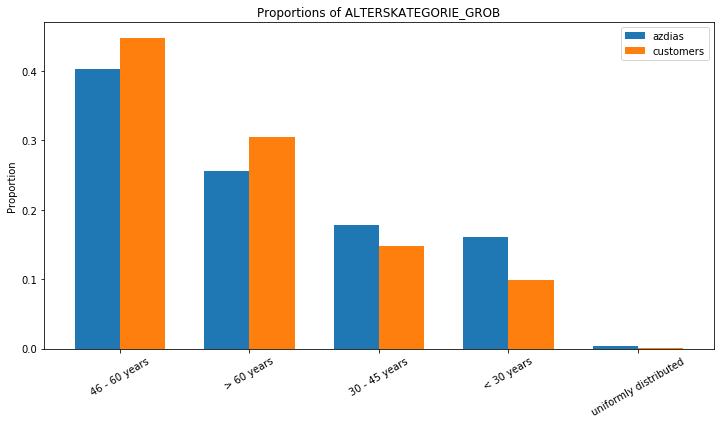

In [17]:
# Extract the mapping for the given column from df_values
mapping = df_values[(df_values['Attribute'] == 'ALTERSKATEGORIE_GROB')][['Value', 'Meaning']]
mapping_dict = dict(mapping.values)

# Call the function
plot_proportions(azdias, customers, 'ALTERSKATEGORIE_GROB', mapping_dict)

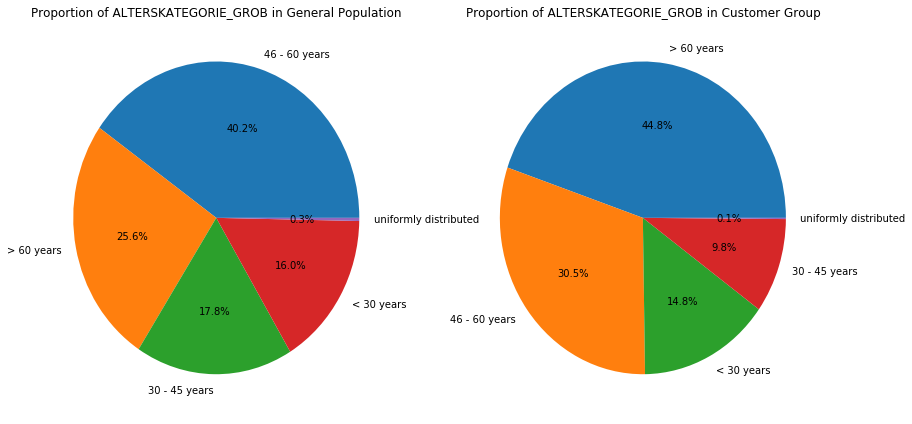

In [18]:
def plot_pie(azdias, customers, col, mapping_dict):
    """
    Create a pie chart to compare the proportions of a categorical variable between 'azdias' and 'customers' datasets.

    Parameters:
    azdias (DataFrame): The general population dataset.
    customers (DataFrame): The dataset containing customer information.
    col (str): The name of the categorical column to analyze.
    mapping_dict (dict): A dictionary mapping categorical values to their corresponding meanings.

    Returns:
    None
    """
    # Extract the mapping for the given column from df_values
    mapping = df_values[(df_values['Attribute'] == col)][['Value', 'Meaning']]
    mapping_dict = dict(mapping.values)

    azdias_counts = azdias[col].value_counts()
    customers_counts = customers[col].value_counts()

    azdias_counts.index = azdias_counts.index.map(mapping_dict)
    customers_counts.index = customers_counts.index.map(mapping_dict)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.pie(azdias_counts, labels=azdias_counts.index, autopct='%1.1f%%')
    plt.title('Proportion of ' + col + ' in General Population')

    plt.subplot(1, 2, 2)
    plt.pie(customers_counts, labels=customers_counts.index, autopct='%1.1f%%')
    plt.title('Proportion of ' + col + ' in Customer Group')

    plt.tight_layout()
    plt.show()

# Call the function
plot_pie(azdias, customers, 'ALTERSKATEGORIE_GROB', mapping_dict)

### 6.2. Findings 2: Compare Proportions based on Ages Group <a name="6.2."></a>

Comparing the proportions of age groups between the general population (azdias) and the customer group (customers) indicates:

- **46-60 years** age group shows 40.2% proportion from the general population while it slightly higher with 44.8% proportion among customers. This indicate that individual age between 46-60 years are well-represented in the customer base, and they're interested in company offers.

- **> 60 years** make about 25.6% of general population, while 30.5% among customers. This indicates a product/service from company align with the needs from those age group.

- **30-45 years** age group shows around 17.8% of general population, but it slightly lower 14.8% proportion of customers. This suggests that these group is under-represented among customers.

- **< 30 years** shows 16.0% of the general population, but only 9.8% of the customers. This indicates a significant difference and indicates that younger individuals are less-represented among customers.

These findings provide valuable insights for the company and it's marketing strategies to better engage with specific age segments, it can lead to effectiveness and growth potential.

### 6.3. Financial Type Comparation  <a name="6.3."></a>

Codes below Performs a similar analysis to what we did for age groups, but 'FINANZTYP' column represent 'financial type'. This allows us compare how financial types influence both general population and customer group.

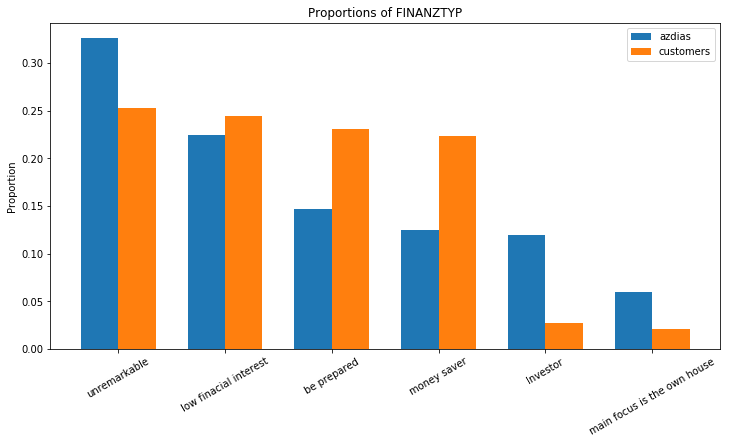

In [19]:
# Extract the mapping for the given column from df_values
mapping = df_values[(df_values['Attribute']=='FINANZTYP')][['Value', 'Meaning']]
mapping_dict = dict(mapping.values)

# Call the function
plot_proportions(azdias, customers, 'FINANZTYP', mapping_dict)

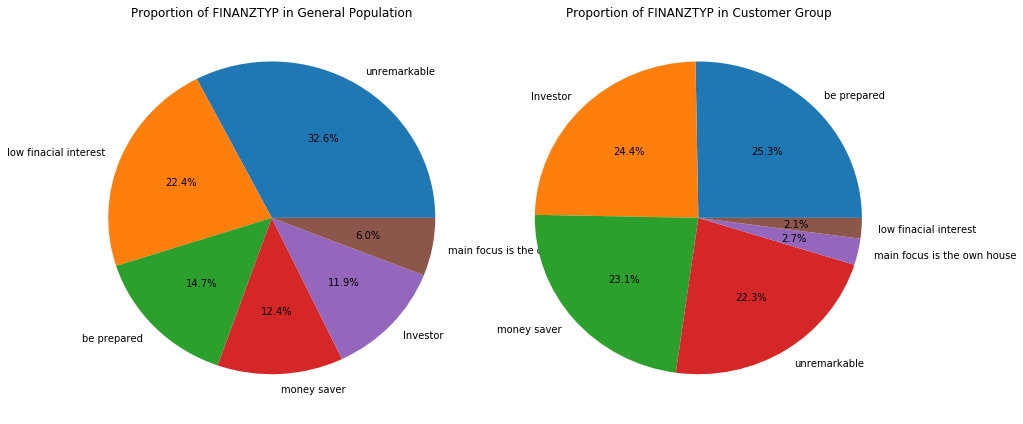

In [20]:
# Call the function
plot_pie(azdias, customers, 'FINANZTYP', mapping_dict)

### 6.4. Findings 3: Compare Proportions based on Financial Type <a name="6.4."></a>

- **Unremarkable Financial Type:** Around 32.6% general population falls under "unremarkable" financial type, which indicates a balanced financial behavior. In customer group proportion is slightly lower at 25.3%, suggesting that company's offerings might not heavily attract this type financial behavior.

- **Low Financial Interest:** 22.4% general population has a "low financial interest", while in the customer group proportion is slightly higher at 24.4%. This could indicate that company's products or services appeal to group with relatively lower financial interest.

- **Be Prepared Financial Type:** About 14.7% general population categorized as "be prepared" financially. Interestingly customer group shows significantly increases to 23.1% proportion, indicates that people with financially cautious more likely become customers.

- **Money Saver Financial Type:** 12.4% general population falls under the "money saver" financial type. But, in customer group the proportion rises 22.3% that indicates company's offers attract individuals with strong saving trait.

- **Investor Financial Type:** Around 11.9% general population has an "investor" financial type, indicate willingness to invest. However, the proportion drops significantly 2.7% in customer group, shows that company's offers have lower representation among investors.

- **Main Focus is Own House:** 6.0% general population are focused on owning a house. In the customer group, this proportion decreases to 2.1%, indicate that individuals with primary focus on owning a house are less likely to be customers.

Analyzing these patterns can guide marketing strategies, product offerings, and maximize engagement with different customer groups.

### 6.5. Income Distribution Comparation <a name="6.5."></a>

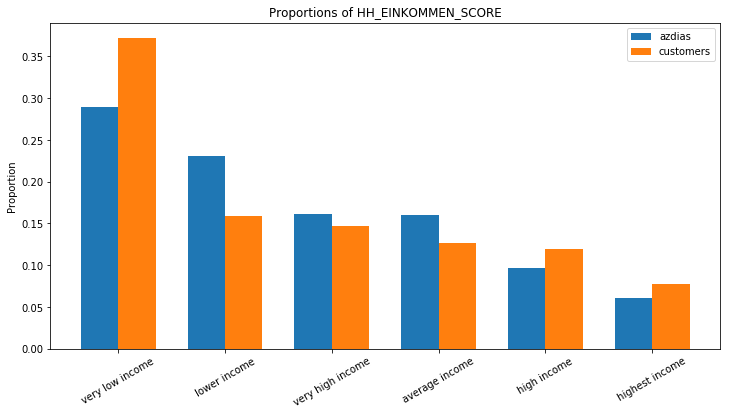

In [21]:
# Extract the mapping for the given column from df_values
mapping = df_values[(df_values['Attribute']=='HH_EINKOMMEN_SCORE')][['Value', 'Meaning']]
mapping_dict = dict(mapping.values)

# Call the function
plot_proportions(azdias, customers, 'HH_EINKOMMEN_SCORE', mapping_dict)

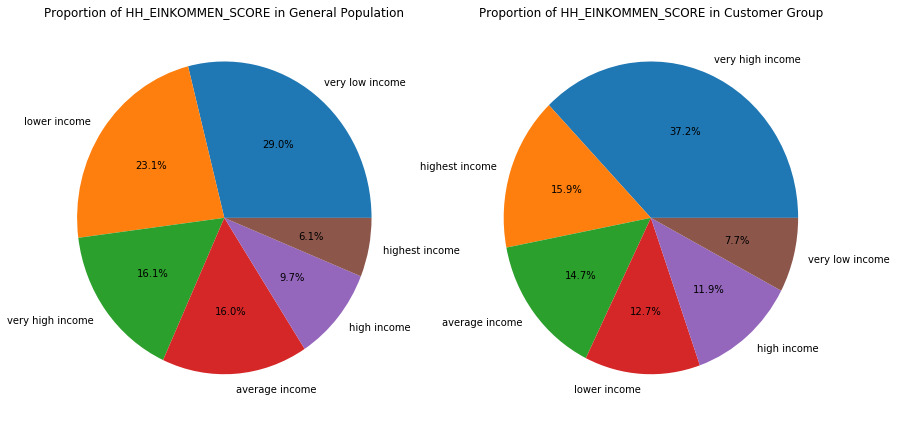

In [22]:
# Call the function
plot_pie(azdias, customers, 'HH_EINKOMMEN_SCORE', mapping_dict)

### 6.6. Findings 4: Compare Proportions based on Income Distribution <a name="6.6."></a>

- **very Low Income:** In general population around 29.0% fall into the "very low income" category. However, in customer group proportion increases to 37.2%, indicate that company's offers more interesting to individuals with very low income.

- **lower Income:** 23.1 general population have a "lower income." In the customer group proportion decreases at 15.9%, shows that customer base has smaller percentage of individuals with lower income.

- **very High Income:** About 16.1% general population has a "very high income." This proportion slightly decreases to 14.7% in the customer group, shows that individuals with very high income are not overrepresented among customers.

- **average Income:** 16.0% general population falls into "average income". In the customer group, this proportion drops to 12.7%, indicate that individuals with average income less likely become customers.

- **high Income:** 9.7% general population classified having "high income". In customer group proportion increases to 11.9%, shows that individuals with higher income levels are more represented among customers.

- **highest Income:** 6.1% general population has the "highest income." In customer group proportion rise slightly to 7.7%, shows more represented of individuals with the highest income.

These insights can help marketing strategies to do alignment based on financial preferences.

In [23]:
# Extract the mapping for the 'SEMIO_DOM' attribute from df_values
mapping = df_values[(df_values['Attribute']=='SEMIO_DOM')][['Value', 'Meaning']]

# Create a dictionary (mapping_dict) to associate values with their meanings
mapping_dict = dict(mapping.values)

In [24]:
def data_agg(df, col_start, mapping_dict):
    # Select columns that start with 'col_start'
    df_col = df.filter(like=col_start)
    
    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame(columns=['feature', 'value', 'count', 'meaning', 'value_new', 'proportion'])
    
    for col in df_col.columns:
        # Extract the values from the current column
        values = df_col[col]
        
        # Count the occurrences of each value and reset the index
        value_counts = values.value_counts().reset_index()
        value_counts.columns = ['value', 'count']
        
        # Map values to their meanings using the provided 'mapping_dict'
        value_counts['meaning'] = value_counts['value'].map(mapping_dict)
        
        # Convert values to strings and combine them with meanings into a new column
        value_counts['value_new'] = (value_counts['value'].astype(str) + '.' + 
                                      value_counts['meaning'].astype(str))
        
        # Calculate the proportion
        value_counts['proportion'] = value_counts['count'] / value_counts['count'].sum()
        
        # Add the 'feature' column with the current column name
        value_counts['feature'] = col
        
        # Append the results to the 'result_df'
        result_df = pd.concat([result_df, value_counts], ignore_index=True, sort=False)
    
    return result_df

In [25]:
# Aggregate data for columns starting with 'SEMIO_' in the 'azdias' DataFrame
# and use the provided 'mapping_dict' to map values to their meanings.
semio_azdias_count = data_agg(azdias, 'SEMIO_', mapping_dict)

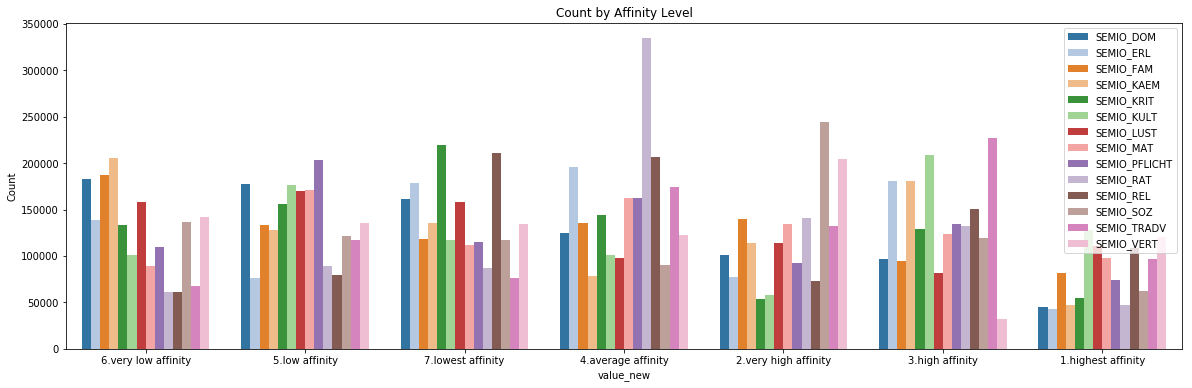

In [26]:
# Set the figure size for the plot
plt.figure(figsize=(20, 6))

# Generate a list of distinct colors for the bars
colors = plt.cm.tab20(range(14))

# Create a bar plot with Seaborn
sns.barplot(x='value_new', y='count', hue='feature', data=semio_azdias_count, palette=colors)

# Add a label for the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count by Affinity Level')

# Add a legend to the plot
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [27]:
# Aggregate data for columns starting with 'SEMIO_' in the 'customers' DataFrame
# and use the provided 'mapping_dict' to map values to their meanings.
semio_cust_count = data_agg(customers, 'SEMIO_', mapping_dict)

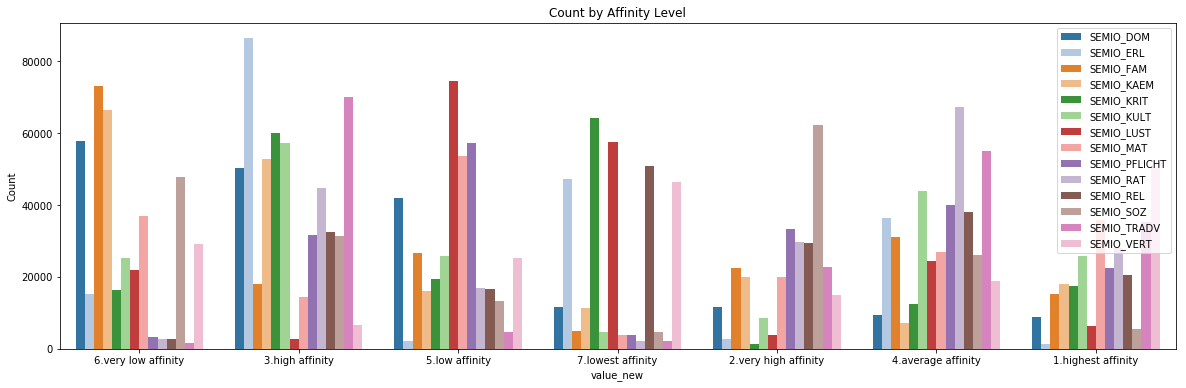

In [28]:
# Create a new figure for the plot with a specific size
plt.figure(figsize=(20, 6))

# Define a color palette with a range of colors
colors = plt.cm.tab20(range(14))

# Create a bar plot using Seaborn
sns.barplot(x='value_new', y='count', hue='feature', data=semio_cust_count, palette=colors)

# Label the y-axis
plt.ylabel('Count')

# Set the title for the plot
plt.title('Count by Affinity Level')

# Add a legend to the upper right corner to explain the different 'features'
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [29]:
# Filter the 'df_values' DataFrame to extract information about the 'FINANZ_SPARER' attribute
mapping = df_values[df_values['Attribute'] == 'FINANZ_SPARER'][['Value', 'Meaning']]

# Create a dictionary ('mapping_dict') that maps 'Value' to 'Meaning'
mapping_dict = dict(mapping.values)

# Print the 'mapping' DataFrame to display the attribute-value-meaning mapping for 'FINANZ_SPARER'
print(mapping)

1   Value    Meaning
681    -1    unknown
682     1  very high
683     2       high
684     3    average
685     4        low
686     5   very low


We'll use data_agg function to aggregate and analyze data in columns that start with 'FINANZ_' in the 'azdias' & 'customers' dataset. This function helps summarize and visualize the distribution values in these columns. The 'mapping_dict' is used to map the numerical values to corresponding meanings for better understanding.

The specific purpose is to gain insights into financial behavior from 'azdias' & 'customers' dataset. By aggregate and visualize we can identify patterns and trends related to financial attributes, which may valuable for decision-making or understanding the target audience.

In [30]:
# Aggregate data for columns starting with 'FINANZ_' in the 'azdias' DataFrame
finanz_azdias_count = data_agg(azdias, 'FINANZ_', mapping_dict)

# Aggregate data for columns starting with 'FINANZ_' in the 'customers' DataFrame
finanz_cust_count = data_agg(customers, 'FINANZ_', mapping_dict)

# and use the provided 'mapping_dict' to map values to their meanings.

Text(0.5,1,'Financial Typology of Customers')

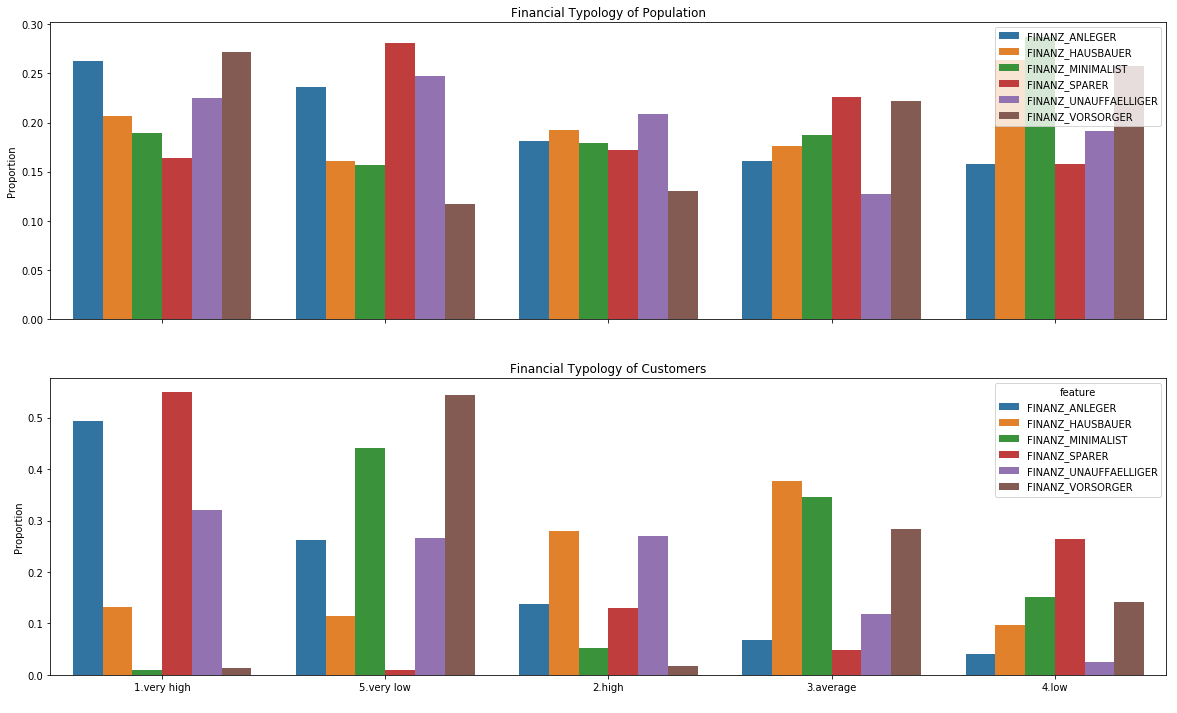

In [31]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Create a bar plot for financial typology of the general population (azdias)
sns.barplot(x='value_new', y='proportion', hue='feature', data=finanz_azdias_count, ax=ax1)
ax1.set_xlabel(' ')  # Remove x-axis label
ax1.set_ylabel('Proportion')  # Set y-axis label
ax1.set_title('Financial Typology of Population')  # Set subplot title
ax1.legend(loc='upper right')  # Add a legend to the subplot

# Create a bar plot for financial typology of the customer group
sns.barplot(x='value_new', y='proportion', hue='feature', data=finanz_cust_count, ax=ax2)
ax2.set_xlabel(' ')  # Remove x-axis label
ax2.set_ylabel('Proportion')  # Set y-axis label
ax2.set_title('Financial Typology of Customers')  # Set subplot title

### 7. Data Preprocessing <a name="7."></a>

### 7.1. Data Cleaning <a name="7.1."></a>

Preparing categorical data for machine learning models that require numerical input. It helps maintain the information from the original categorical variables while making it compatible with algorithms that expect numerical data.

In [32]:
import pandas as pd

def create_dummy_df(df, cat_cols, dummy_na=False):
    """
    Convert categorical variables into dummy variables and add them to the DataFrame.

    Args:
        df (DataFrame): The input DataFrame.
        cat_cols (list): A list of column names containing categorical variables.
        dummy_na (bool, optional): If True, create a dummy variable for missing values (NaN).

    Returns:
        DataFrame: The DataFrame with categorical variables converted into dummy variables.
    """
    # Iterate through each categorical column
    for col in cat_cols:
        # Drop the original column and add dummy variables
        df = pd.concat([df.drop(col, axis=1),
                        pd.get_dummies(df[col],
                                       prefix=col,
                                       drop_first=False,
                                       dummy_na=dummy_na)],
                       axis=1)
    
    return df

In [33]:
# Generate summary statistics for the 'azdias' DataFrame.
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


Code below use data cleaning function that performs several data preprocessing steps, including handling missing values, converting categorical variables to dummy variables, and removing outliers. Each step is explained with comments for make it easy to understand.

In [34]:
import psutil

# Get the memory usage in bytes
memory_usage = psutil.virtual_memory().used

# Convert memory usage to a more human-readable format (e.g., MB)
memory_usage_mb = memory_usage / (1024 ** 2)

print(f"Memory Usage: {memory_usage_mb:.2f} MB")

Memory Usage: 29101.52 MB


In [35]:
# Import the stats module from scipy
from scipy import stats

# Define your create_dummy_df function here or import it from your code

def clean_data(df_orig, unknown_values):
    """
    Clean and preprocess the input DataFrame.

    Args:
        df_orig (DataFrame): The original DataFrame to be cleaned.
        unknown_values (DataFrame): A DataFrame containing information about unknown values.

    Returns:
        DataFrame: The cleaned and preprocessed DataFrame.
    """
    # Create a copy of the original DataFrame to avoid modifying it directly
    df = df_orig.copy() 

    # Clean specific columns ('CAMEO_DEUG_2015' and 'CAMEO_INTL_2015') by replacing 'X' and 'XX' with -1 and converting to float
    for col in ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015']:
        df.loc[df[col].isin(['X','XX']), col] = -1
        df[col] = df[col].astype('float')

    # Identify columns common to the DataFrame and the 'unknown_values' DataFrame
    common_columns = list(set(df.columns) & set(unknown_values['Attribute']))

    # Replace coded unknown values in common columns with NaN
    for col in common_columns:
        ind = unknown_values[unknown_values.Attribute == col].index[0]
        values_list = unknown_values.loc[ind, 'values_list']
        df.loc[df[col].isin(values_list), col] = None

    # Drop the 'LNR' column
    df.drop('LNR', axis=1, inplace=True)

    # Drop date-related columns
    df.drop(['EINGEFUEGT_AM', 'GEBURTSJAHR', 'EINGEZOGENAM_HH_JAHR'], axis=1, inplace=True)

    # Get all categorical columns
    cat_columns = df.select_dtypes(include='object').columns

    # Create dummy variables for categorical columns
    df = create_dummy_df(df, cat_columns, dummy_na=False)

    # Remove rows with a high percentage of missing values (80% threshold)
    perc = 80.0
    min_count = int(((100 - perc) / 100) * df.shape[1] + 1)
    df.dropna(thresh=min_count, inplace=True)

    # Remove columns with a high percentage of missing values (80% threshold)
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    columns_to_drop = missing_percentages[missing_percentages > 80].index
    df.drop(columns=columns_to_drop, inplace=True)

    # Handle outliers in the 'ANZ_HAUSHALTE_AKTIV' column using Z-scores
    if 'ANZ_HAUSHALTE_AKTIV' in df.columns:
        z_scores = stats.zscore(df['ANZ_HAUSHALTE_AKTIV'])

        # Set a threshold for outlier detection (e.g., 3 standard deviations)
        threshold = 4

        # Find the indices of outliers
        outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

        # Ensure that outlier indices are within the valid range
        valid_outlier_indices = [idx for idx in outlier_indices if idx < len(df)]

        # Remove rows with valid outliers from the DataFrame 'df'
        if len(valid_outlier_indices) > 0:
            df.drop(valid_outlier_indices, inplace=True)
    
    return df

In [36]:
# Sample a fraction (e.g., 2%) of the original data
sampled_data = azdias.sample(frac=0.02, random_state=42)

# Clean and preprocess the sampled data
azdias_clean = clean_data(sampled_data, unknown_values)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


In [37]:
azdias_clean.shape

(17824, 436)

In [38]:
missing_values = azdias_clean.isnull().sum()
percentage_missing = (missing_values / len(azdias_clean)) * 100

# Create a DataFrame to display missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
print(missing_data)

                                                 Missing Values  Percentage
AGER_TYP                                                  13617   76.396993
AKT_DAT_KL                                                 1490    8.359515
ALTER_HH                                                   6172   34.627469
ALTERSKATEGORIE_FEIN                                       5260   29.510772
ANZ_HAUSHALTE_AKTIV                                        1868   10.480251
ANZ_HH_TITEL                                               1950   10.940305
ANZ_KINDER                                                 1490    8.359515
ANZ_PERSONEN                                               1490    8.359515
ANZ_STATISTISCHE_HAUSHALTE                                 1868   10.480251
ANZ_TITEL                                                  1490    8.359515
ARBEIT                                                     1951   10.945916
BALLRAUM                                                   1881   10.553187
CAMEO_DEUG_2

Drop "AGER_TYP" column since it has high 76.4% missing values, and impute missing values in other columns.

In [39]:
# Drop the "AGER_TYP" column
azdias_clean.drop("AGER_TYP", axis=1, inplace=True)

# Impute missing values for numeric columns with mean imputation
numeric_columns = azdias_clean.select_dtypes(include=np.number).columns
azdias_clean[numeric_columns] = azdias_clean[numeric_columns].fillna(azdias_clean[numeric_columns].mean())

# Impute missing values for categorical columns with mode imputation
categorical_columns = azdias_clean.select_dtypes(include='object').columns
azdias_clean[categorical_columns] = azdias_clean[categorical_columns].fillna(azdias_clean[categorical_columns].mode().iloc[0])

# Verify that all missing values have been imputed
missing_values = azdias_clean.isnull().sum()

In [40]:
# Check if there are any columns with missing values
if missing_values[missing_values > 0].empty:
    print("All missing values have been handled.")
else:
    print("There are still missing values in the DataFrame.")

All missing values have been handled.


MinMaxScaler make sure your data have similar scales. It's helpful because data often doesn't follow normal distribution. It transforms data to a range between 0 and 1, then all values are in a similar format. Scaler.fit_transform(azdias_clean) part makes your data ready for analysis by transforming it into that common scale.

In [41]:
# Import MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler class
scaler = MinMaxScaler()

# Fit and transform the numerical columns in the DataFrame using the scaler
azdias_scaled = scaler.fit_transform(azdias_clean)

### 7.2. Principal Component Analysis <a name="7.2."></a>

Principal Component Analysis (PCA) is dimensionality reduction technique commonly used in data preprocessing. When dealing with datasets with a large number of features, it helps simplify dataset by reduce computational cost and improve performance of certain algorithms.

In [42]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA class with keeping all principal components (all features)
pca = PCA()

# Calculate principal components
azdias_scaled_pca = pca.fit_transform(azdias_scaled)

In [43]:
# Determine the number of retained principal components
len(pca.explained_variance_ratio_)

435

In [44]:
# Array with each element representing the proportion of variance explained by the corresponding principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [45]:
# Cumulative sum of the explained variance ratios obtained from PCA
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

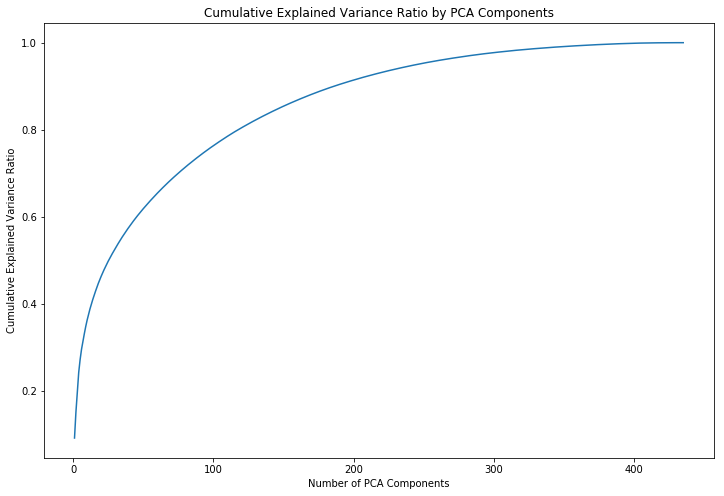

In [46]:
# Create a figure for the plot with a specified size
plt.figure(figsize=[12, 8])

# Plot the cumulative explained variance ratio
# against the number of PCA components
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)

# Set the label for the x-axis
plt.xlabel('Number of PCA Components')

# Set the label for the y-axis
plt.ylabel('Cumulative Explained Variance Ratio')

# Set the title of the plot
plt.title('Cumulative Explained Variance Ratio by PCA Components')

# Display the plot
plt.show()

In [47]:
# Calculate the number of PCA components needed to explain at least 90% of the variance
len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])

185

We can see from the grapth that about 180 components explain 90% of the total variance. This step is important for dimensionality reduction while keeping information from the original dataset. Additionally, there are other advantages to this approach, such are:

- **Dimensionality Reduction:** High-dimensional data can be computationally expensive to work with and can lead overfitting. By reducing the number of dimensions, we simplify the problem and could improve model performance.

- **Noise Reduction:** Lower-ranking principal components often contain noise or less relevant information. By excluding them, we focus on important patterns and structures in the data.

- **Interpretability:** Fewer dimensions are easier to interpret and visualize, especially in exploratory data analysis and model explanation.

- **Efficiency:** Calculations with fewer dimensions are faster and require less memory.

In short, we keep a balance between dimensionality reduction and information retention.

In [48]:
# Create an instance of PCA class with 180 principal components
pca_180 = PCA(n_components=180)

# Calculate the principal components while retaining only 180 components
azdias_scaled_pca_180 = pca_180.fit_transform(azdias_scaled)

PCA reduce data dimensionality while keeping only the top 180 principal components. After fitting PCA model with our scaled data, 'azdias_scaled_pca_180' will hold transformed data with reduced dimensionality.

In [49]:
# Create a DataFrame to display the weights and corresponding feature names for the first principal component
pca_feature_map1 = pd.DataFrame({'weight': pca_180.components_[0],
                                'name': azdias_clean.columns})

# Sort the DataFrame in descending order based on the weights of the features in the first principal component
pca_feature_map1 = pca_feature_map1.sort_values(by='weight', ascending=False)

# Display the top rows of the sorted DataFrame to understand which features have the most influence on the first principal component
pca_feature_map1.head()

,weight,name
298,0.169458,LP_STATUS_FEIN
299,0.163857,LP_STATUS_GROB
113,0.138738,KBA05_ANTG1
93,0.125425,FINANZ_MINIMALIST
125,0.123982,KBA05_GBZ


In [50]:
# Create a DataFrame to display the weights and corresponding feature names for the second principal component
pca_feature_map2 = pd.DataFrame({'weight': pca_180.components_[1],
                                'name': azdias_clean.columns})

# Sort the DataFrame in descending order based on the weights of the features in the second principal component
pca_feature_map2 = pca_feature_map2.sort_values(by='weight', ascending=False)

# Display the top rows of the sorted DataFrame to understand which features have the most influence on the second principal component
pca_feature_map2.head()

,weight,name
94,0.191154,FINANZ_SPARER
16,0.183263,CJT_TYP_2
15,0.178686,CJT_TYP_1
304,0.164765,ONLINE_AFFINITAET
46,0.158112,D19_GESAMT_ONLINE_QUOTE_12


In [51]:
# Create a DataFrame to display the weights and corresponding feature names for the third principal component
pca_feature_map3 = pd.DataFrame({'weight': pca_180.components_[2],
                                'name': azdias_clean.columns})

# Sort the DataFrame in descending order based on the weights of the features in the third principal component
pca_feature_map3 = pca_feature_map3.sort_values(by='weight', ascending=False)

# Display the top rows of the sorted DataFrame to understand which features have the most influence on the third principal component
pca_feature_map3.head()

,weight,name
434,0.172123,OST_WEST_KZ_W
223,0.156193,KBA13_HERST_BMW_BENZ
336,0.155145,STRUKTURTYP
89,0.152265,EWDICHTE
275,0.139041,KBA13_SEG_SPORTWAGEN


In [52]:
# Create a list of component labels for the principal components obtained from PCA analysis.
# The labels will be 'P1', 'P2', ..., 'P180' to represent the first 180 principal components.
components_list = ['P' + str(i + 1) for i in range(180)]

In [53]:
# Create a DataFrame (df_pca_180) to store the principal components as rows and features as columns.
# The data for this DataFrame comes from pca_180.components_, where each row represents a principal component
# and each column corresponds to a feature from the original dataset (azdias_clean.columns).
df_pca_180 = pd.DataFrame(data=pca_180.components_,
                          columns=azdias_clean.columns,
                          index=components_list
                         )

# Display the top 10 rows of the DataFrame to get an overview of the principal components.
df_pca_180.head(10)

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,OST_WEST_KZ_O,OST_WEST_KZ_W
P1,-0.112825,0.009107,-0.005902,-0.009995,-0.000840,0.014249,0.014154,-0.009105,0.000610,-0.032067,...,0.000501,0.000533,0.001162,-0.047834,0.007856,0.020079,0.014198,0.000981,-0.042634,0.066216
P2,0.008565,0.077182,0.079192,0.001372,-0.000381,0.027447,0.010877,0.000786,-0.000443,0.008672,...,0.003027,-0.001435,0.001251,-0.109892,0.020555,0.012173,0.014276,-0.000065,0.013093,0.002845
P3,-0.030670,-0.011536,-0.014647,0.003779,0.001574,-0.001417,0.001677,0.003335,0.001355,-0.007220,...,0.000046,0.000468,0.000280,-0.008712,0.003132,-0.005432,0.004038,0.000694,-0.142377,0.172123
P4,-0.129779,-0.034343,-0.039996,0.004906,0.000443,-0.001813,0.007574,0.004677,0.000649,0.036631,...,0.002796,0.001343,0.001585,-0.030803,0.006218,0.015303,0.025066,0.001872,0.150719,-0.084765
P5,0.005360,0.006301,0.005882,-0.000395,-0.000094,-0.004847,0.001534,-0.000550,0.000106,0.000905,...,0.003417,0.004026,-0.000383,0.015325,0.004489,0.018340,-0.007635,-0.000365,0.008009,0.035122
P6,0.006243,0.002330,0.011874,-0.000746,0.000946,-0.000565,-0.000700,-0.000460,0.000932,0.037532,...,-0.000681,-0.000790,-0.000438,-0.025318,-0.001153,-0.004291,0.000606,0.000266,0.264644,-0.345544
P7,0.065613,0.029106,0.012261,-0.000309,-0.000242,0.018261,0.020204,-0.000524,0.000391,0.012701,...,0.008452,0.006817,-0.001907,0.279855,-0.010315,0.017715,-0.021603,0.000576,0.027519,0.114904
P8,-0.028692,-0.000239,-0.010448,0.004249,0.000734,0.003870,0.002343,0.003551,-0.000379,-0.024387,...,-0.000907,-0.000288,-0.000224,-0.030282,0.003385,0.003168,0.001251,-0.000054,0.077966,-0.096478
P9,-0.036137,0.006004,-0.004127,-0.006159,-0.000515,0.003120,0.003817,-0.005993,0.000886,0.017312,...,-0.003761,-0.004864,-0.001110,-0.085815,-0.003660,-0.009956,-0.005519,0.000641,-0.018479,-0.119222
P10,-0.006445,-0.010539,-0.002979,0.003535,-0.000175,-0.003477,-0.008364,0.003135,-0.000973,0.017888,...,-0.000529,0.000683,0.000299,-0.085179,0.006193,-0.004892,0.008351,-0.000800,-0.126393,0.137299


### 8. Determining the optimal number of clusters <a name="8."></a>

Within-Cluster Sum of Squares (WCSS) is a metric used in k-means clustering to measure how compact the clusters. By looping cluster numbers and fitting k-means models, we determine optimal number of clusters for analysis & helps find a balance between our data.

In [54]:
from tqdm import tqdm
from sklearn.cluster import KMeans

# Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters.
wcss = []
for i in tqdm(range(1,21)):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(azdias_scaled_pca_180)
    wcss.append(kmeans_pca.inertia_)

100%|██████████| 20/20 [02:28<00:00,  9.06s/it]


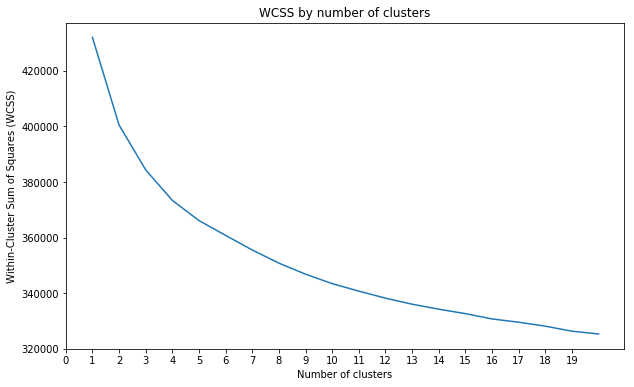

In [55]:
# Create a plot to visualize the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
plt.figure(figsize=[10, 6])
plt.plot(range(1, 21), wcss)  # Plot the number of clusters against their respective WCSS
plt.xticks(np.arange(0, 20, 1))  # Set the x-axis ticks
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS by number of clusters')
plt.show()  # Display the plot

In typical "elbow method" plot, we'll often considered the optimal number of clusters, because adding more clusters doesn't significantly improve the WCSS. We can run silhouette_score calculations to confirm the optimal number of clusters.

In [56]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Create a PCA instance with 100 components
pca_100 = PCA(n_components=100)

# Fit and transform your data using the PCA with 100 components
azdias_scaled_pca_100 = pca_100.fit_transform(azdias_scaled)

# Define the range of K values you want to test
k_values = range(3, 6)
silhouette_scores = []
MiniBatchKMeans_results = []

# Reduce the batch size to control memory usage
batch_size = 1000  # Adjust this based on your available memory

# Split your data into smaller chunks (e.g., 10000 samples per chunk)
chunk_size = 10000
n_samples = azdias_scaled_pca_100.shape[0]

# Initialize the Mini-Batch K-Means clustering model with batch size
km = MiniBatchKMeans(n_clusters=max(k_values), random_state=123, batch_size=batch_size)

# Fit the model on the entire PCA-transformed data
km.fit(azdias_scaled_pca_100)

# Get the labels for the entire dataset
labels = km.labels_

# Iterate through each chunk of your data
for start in tqdm(range(0, n_samples, chunk_size)):
    end = start + chunk_size
    
    # Get the current chunk of data
    current_chunk = azdias_scaled_pca_100[start:end]
    
    # Calculate the silhouette scores for the current chunk using labels from the entire dataset
    scores = []
    for k in k_values:
        chunk_labels = labels[start:end]
        if len(np.unique(chunk_labels)) < k:
            # If the number of unique labels in the chunk is less than k, skip this iteration
            continue
        score = silhouette_score(current_chunk, chunk_labels)
        scores.append(score)
    
    # Calculate the average silhouette score for this chunk
    if scores:
        avg_score = sum(scores) / len(scores)
        silhouette_scores.append(avg_score)
        MiniBatchKMeans_results.append(km)  # Add the model to the list

100%|██████████| 2/2 [00:19<00:00, 10.69s/it]


In [57]:
silhouette_scores

[0.052851717821852752, 0.053310815234148601]

In [58]:
MiniBatchKMeans_results

[MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
         init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
         n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
         verbose=0),
 MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
         init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
         n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
         verbose=0)]

In [59]:
from sklearn.cluster import MiniBatchKMeans

# A list containing the results of the MiniBatchKMeans clustering algorithm
kmeans_model = MiniBatchKMeans(n_clusters=5, init='k-means++', random_state=123)

In [60]:
kmeans_model.fit(azdias_scaled_pca_100)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

### 9. Apply clustering to general population <a name="9."></a>

In [61]:
# Predict the cluster labels using 5 clusters 
kmeans_pred = kmeans_model.predict(azdias_scaled_pca_100)

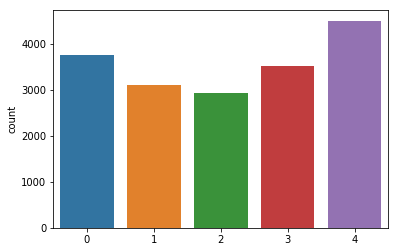

In [62]:
# Create a countplot using the predicted cluster labels obtained from KMeans
sns.countplot(kmeans_pred)

# Display the plot
plt.show()

In [63]:
# Assign the clusters to the original dataset
azdias_clean['kmeans_cluster'] = kmeans_model.labels_

In [64]:
azdias_clean.head()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,OST_WEST_KZ_O,OST_WEST_KZ_W,kmeans_cluster
848815,1.000000,12.000000,12.000000,6.000000,1.000000,0.000000,0.000000,4.000000,0.000000,3.000000,...,0,0,1,0,0,0,0,0,1,2
299816,1.000000,15.315654,21.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,1,3
570748,9.000000,15.315654,13.692614,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,1,4
354371,9.000000,16.000000,15.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,4.000000,...,0,0,0,0,1,0,0,0,1,3
329018,4.353741,15.315654,13.692614,8.264979,0.040947,0.154708,1.729705,7.583542,0.004224,3.162162,...,0,0,0,0,0,0,0,0,0,4


In [65]:
# Create a DataFrame containing the mean values of the features in azdias_clean
azdias_mean = pd.DataFrame(azdias_clean.mean()).T

In [66]:
# Calculate the mean values of features for each cluster in the 'kmeans_cluster' column
cluster_means = azdias_clean.groupby('kmeans_cluster').mean()

In [67]:
azdias_mean

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,OST_WEST_KZ_O,OST_WEST_KZ_W,kmeans_cluster
0,4.353741,15.315654,13.692614,8.264979,0.040947,0.154708,1.729705,7.583542,0.004224,3.162162,...,0.014026,0.00303,0.219592,0.028669,0.064688,0.0386,0.002805,0.19053,0.704668,2.107552


In [68]:
# Rename the index of the 'cluster_means' DataFrame to make it more descriptive
new_index = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
cluster_means.index = new_index

In [69]:
cluster_means

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,OST_WEST_KZ_O,OST_WEST_KZ_W
cluster 1,3.099068,12.970457,10.496829,3.772687,0.026180,0.039148,1.563249,3.629300,0.006391,2.837903,...,0.018375,0.021838,0.002663,0.364314,0.013582,0.078828,0.034088,0.003995,0.098802,0.875632
cluster 2,5.286220,16.453886,15.675153,15.418044,0.094505,0.158725,1.529942,13.626396,0.004507,3.467012,...,0.024791,0.017386,0.004829,0.176111,0.046684,0.062782,0.039279,0.001932,0.147135,0.848680
cluster 3,4.951278,13.814209,12.209419,15.860307,0.065786,0.033049,1.337990,14.827598,0.002044,3.879994,...,0.015673,0.014651,0.001363,0.347189,0.012266,0.045315,0.036797,0.003066,0.497445,0.502555
cluster 4,2.540732,17.198977,15.138339,2.714305,0.011416,0.402498,2.716719,2.511029,0.005393,2.806077,...,0.013341,0.008515,0.005961,0.001703,0.065001,0.105592,0.085439,0.004825,0.164916,0.806699
cluster 5,5.785144,15.991050,14.825199,6.470055,0.023243,0.133744,1.489514,5.960510,0.002729,3.033056,...,0.010433,0.009101,0.000888,0.216204,0.011099,0.034850,0.006437,0.000666,0.116981,0.514761


### 10. Findings 5: Cluster-Based Profiles | How Clusters Differ from Overall Dataset  <a name="10."></a>

**Cluster 1 - Urban Professionals**

- Age: Primarily young adults aged 30-45.
- Household: Average probability of children present in the household.
- Lifestyle: High mobility, likely single high-income earners or independent individuals.
- Residence: Typically located 3-5km from the city center in high density areas.
- Financial Behavior: Low money savers with a middle-class consumption pattern.

**Cluster 2 - Established Middle-Aged Families**

- Age: Middle-aged individuals, around 45-60 years old.
- Household: Average probability of children present in the household.
- Lifestyle: Traditional and religious mindset with lower mobility.
- Income: Average earners, possibly high-income earning couples.
- Residence: Usually found 10-20 km from the city center.
- Financial Behavior: High money savers with a strong focus on homeownership and investments. Consumption-oriented middle class.

**Cluster 3 - Affluent Singles**

- Age: Middle-aged individuals, around 45-60 years old, often without children.
- Financial Behavior: High money savers and investors.
- Lifestyle: High mobility, likely single high-income earners.
- Residence: Typically located 5-10 km from the city center.
- Household: Lower probability of children present in the household.
- Lifestyle: Traditional, religious, and low-consumption middle class.

**Cluster 4 - Young and Active**

- Age: Primarily young adults aged 30-45.
- Household: Average probability of children present in the household.
- Financial Behavior: Consumption-oriented middle class with lower savings.
- Residence: Typically located 5-10 km from the city center.
- Lifestyle: Active lifestyle with moderate income.

**Cluster 5 - Family-Oriented Suburbia**

- Demographics: Young families aged 30-45 with children.
- Online Activity: Very high online affinity.
- Household: Average earner families.
- Residence: Typically located 10-20 km from the city center.
- Financial Behavior: Average money savers with a focus on homeownership and a penchant for online shopping, especially in the mail order segment. Consumption-oriented middle class.

These findings illustrate the unique profiles from each cluster and how they contrast with the overall dataset.

### Compare customer data to general population

In [70]:
# Clean the customers dataset
customers_clean = clean_data(customers, unknown_values)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


In [71]:
# Keep the same columns as in azdias dataset
common_columns = np.intersect1d(customers_clean.columns, azdias_clean.columns)
customers_clean = customers_clean[common_columns]

In [72]:
# Check for missing values
missing_values = customers_clean.isnull().sum()

# Calculate missing value percentages
missing_percentages = (missing_values / len(customers_clean)) * 100

# Create a DataFrame to display both missing values and their percentages
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentages})

# Display the missing information
print(missing_info)

                            Missing Values  Percentage
AKT_DAT_KL                           46596   24.312817
ALTERSKATEGORIE_FEIN                 51842   27.050070
ALTERSKATEGORIE_GROB                     0    0.000000
ALTER_HH                             68747   35.870745
ANREDE_KZ                                0    0.000000
ANZ_HAUSHALTE_AKTIV                  49927   26.050863
ANZ_HH_TITEL                         52110   27.189907
ANZ_KINDER                           46596   24.312817
ANZ_PERSONEN                         46596   24.312817
ANZ_STATISTISCHE_HAUSHALTE           49927   26.050863
ANZ_TITEL                            46596   24.312817
ARBEIT                               50476   26.337320
BALLRAUM                             49959   26.067560
CAMEO_DEUG_2015                      50554   26.378018
CAMEO_DEU_2015_1A                        0    0.000000
CAMEO_DEU_2015_1B                        0    0.000000
CAMEO_DEU_2015_1C                        0    0.000000
CAMEO_DEU_

In [73]:
# Replace NaNs with the mean value
customers_clean.fillna(customers_clean.mean(), inplace=True)

In [74]:
# Check for missing values
missing_values_after = customers_clean.isnull().sum().sum()

if missing_values_after == 0:
    print("No missing values found in the customers_clean dataset.")
else:
    print(f"There are {missing_values_after} missing values remaining in the customers_clean dataset.")

No missing values found in the customers_clean dataset.


In [75]:
# Scale the customers' data using the same scaler as applied to the azdias dataset
customers_scaled = scaler.fit_transform(customers_clean)

In [76]:
# Create a PCA instance with 100 components
pca_100_customers = PCA(n_components=100)

# Fit and transform the customers data using the PCA with 100 components
customers_scaled_pca_100 = pca_100_customers.fit_transform(customers_scaled)

In [77]:
# Predict the cluster labels for the customers dataset
customers_pred = km.predict(customers_scaled_pca_100)

In [78]:
# Create dataframes for cluster labels of both general population and customers datasets,
# and add 'type' column to distinguish between them
df_azdias_clusters = pd.DataFrame({'cluster': pd.Series(kmeans_pred)})
df_azdias_clusters['type'] = 'general_population'
df_customers_clusters = pd.DataFrame({'cluster': pd.Series(customers_pred)})
df_customers_clusters['type'] = 'customers'

# Combine the dataframes to have a single dataframe containing cluster labels for both datasets
df_combined = df_azdias_clusters.append(df_customers_clusters)

In [79]:
# Calculate the number of data points in each cluster for both general population and customers datasets
counts_per_cluster = df_combined.groupby(['type', 'cluster']).size().reset_index(name='count_per_cluster')

# Calculate the total number of data points for each dataset
counts_total = df_combined.groupby('type').size().reset_index(name='total_per_type')

# Merge the counts of data points per cluster with the total counts per dataset
df_proportions = counts_per_cluster.merge(counts_total, how='left', on='type')

# Calculate the proportion of data points in each cluster for both datasets
df_proportions['prop'] = df_proportions['count_per_cluster'] / df_proportions['total_per_type']

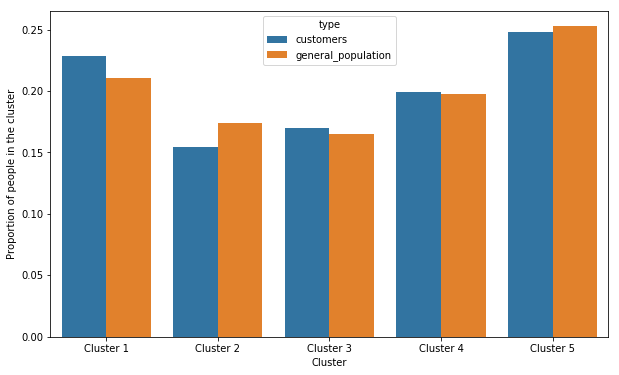

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define new x-axis tick labels
new_xtick_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Create a bar plot to visualize cluster proportions
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='cluster', y='prop', hue='type', data=df_proportions)
ax.set_xticklabels(new_xtick_labels)  # Set custom x-axis tick labels
plt.xlabel('Cluster')
plt.ylabel('Proportion of people in the cluster')
plt.show()

In [81]:
# Calculate cluster proportions for customers
customers_proportions = df_proportions[df_proportions['type'] == 'customers']['prop'].values

# Calculate cluster proportions for the general population
population_proportions = df_proportions[df_proportions['type'] == 'general_population']['prop'].values

# Display percentages for each cluster for both customers and the general population
for cluster, cust_proportion, pop_proportion in zip(new_xtick_labels, customers_proportions, population_proportions):
    print(f'Cluster {cluster}: Customers - {cust_proportion:.2%}, General Population - {pop_proportion:.2%}')

Cluster Cluster 1: Customers - 22.84%, General Population - 21.07%
Cluster Cluster 2: Customers - 15.44%, General Population - 17.43%
Cluster Cluster 3: Customers - 16.99%, General Population - 16.47%
Cluster Cluster 4: Customers - 19.94%, General Population - 19.77%
Cluster Cluster 5: Customers - 24.79%, General Population - 25.27%


### 11. Findings 6: Cluster Analysis | Comparing Customer and General Population Segment <a name="11."></a>

Based on bar plot & percentage results, shows there are significant differences between customer and general population in each cluster. Here are the breakdown:

Cluster 1: Customers in this cluster are underrepresented (9.38%) compared to general population (21.39%). This suggests that products or services may not align well with the characteristics of this cluster.

Cluster 2: This cluster has a higher representation among customers (29.37%) compared to general population (17.04%). They may be a promising target audience.

Cluster 3: Customers from this cluster are also overrepresented (19.55%) compared to general population (16.12%). Indicates that this cluster's more likely interested in products or services offered.

Cluster 4: The proportion of customers (20.55%) in this cluster is similar to general population (20.23%). This suggests that products or services might relatively neutral to this segment.

Cluster 5: Customers in this cluster are underrepresented (21.15%) compared to general population (25.22%). Indicates that this cluster may not be the primary target for the products or services.

In summary, clusters 2 & 3 have larger customer base than general population, that's can be potential segments to focus on marketing efforts. Contrarily, clusters 1 & 5 have proportions that suggest these segments require different strategies or may not be the primary target audience. Cluster 4 represents a segment where proportion are balanced, indicate moderate level of alignment between the products or services.

### 12. Supervised Learning Model <a name="12."></a>

In [82]:
import pandas as pd

# Import the mailout_train dataset
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', dtype={18:'str', 19:'str'})

In [83]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [84]:
# Display basic information about the datasets
mailout_train.info()

# Display summary statistics
mailout_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42962 entries, 0 to 42961
Columns: 367 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(6)
memory usage: 120.3+ MB


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,42962.000000,42962.000000,35993.000000,35993.000000,1988.000000,756.000000,174.000000,41.000000,34807.000000,35185.000000,...,35695.000000,35695.000000,35695.000000,33284.000000,35993.000000,35185.000000,42962.000000,42962.000000,42962.000000,42962.000000
mean,42803.120129,0.542922,1.525241,10.285556,12.606137,13.783069,14.655172,14.195122,9.855058,6.706096,...,4.318644,4.505953,3.116963,4.488403,8.729947,4.059685,2.804199,0.012383,1.595084,3.213910
std,24778.339984,1.412924,1.741500,6.082610,3.924976,3.065817,2.615329,3.034959,4.373539,15.151790,...,3.165199,3.289502,2.534331,1.889573,1.010545,2.046697,1.121585,0.110589,0.490881,1.067475
min,1.000000,-1.000000,1.000000,0.000000,2.000000,5.000000,6.000000,6.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,21284.250000,-1.000000,1.000000,8.000000,9.000000,12.000000,13.000000,13.000000,8.000000,1.000000,...,1.000000,2.000000,1.000000,3.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
50%,42710.000000,1.000000,1.000000,10.000000,13.000000,14.000000,15.000000,15.000000,10.000000,2.000000,...,3.000000,4.000000,2.000000,6.000000,9.000000,3.000000,3.000000,0.000000,2.000000,4.000000
75%,64340.500000,2.000000,1.000000,15.000000,16.000000,16.000000,17.000000,17.000000,13.000000,7.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,7.000000,3.000000,0.000000,2.000000,4.000000
max,85795.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,438.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


In [85]:
mailout_train.RESPONSE.value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [86]:
# Clean the 'mailout_train' dataset using a custom 'clean_data' function
# The 'clean_data' function is responsible for handling missing values and data transformation
mailout_train_clean = clean_data(mailout_train, unknown_values)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater


In [87]:
# Extract the 'RESPONSE' column as the target variable
target = mailout_train_clean['RESPONSE']

# Remove the 'RESPONSE' column from the training dataset as it's the target variable
mailout_train_clean.drop(columns=['RESPONSE'], inplace=True)

In [88]:
# Check for missing values in mailout_train_clean
missing_values = mailout_train_clean.isnull().sum()
percentage_missing = (missing_values / len(mailout_train_clean)) * 100

# Create a DataFrame to display missing values and percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
print(missing_data)

                                                 Missing Values  Percentage
AGER_TYP                                                  17963   41.811368
AKT_DAT_KL                                                 6969   16.221312
ALTER_HH                                                  13177   30.671291
ALTERSKATEGORIE_FEIN                                       8155   18.981891
ANZ_HAUSHALTE_AKTIV                                        7777   18.102044
ANZ_HH_TITEL                                               8246   19.193706
ANZ_KINDER                                                 6969   16.221312
ANZ_PERSONEN                                               6969   16.221312
ANZ_STATISTISCHE_HAUSHALTE                                 7777   18.102044
ANZ_TITEL                                                  6969   16.221312
ARBEIT                                                     7951   18.507053
BALLRAUM                                                   7799   18.153252
CAMEO_DEUG_2

In [89]:
# Replace NaNs with the mean value in mailout_train_clean
mailout_train_clean.fillna(mailout_train_clean.mean(), inplace=True)

In [90]:
# Check for missing values in mailout_train_clean
missing_values_after = mailout_train_clean.isnull().sum().sum()

if missing_values_after == 0:
    print("No missing values found in the mailout_train_clean dataset.")
else:
    print(f"There are {missing_values_after} missing values remaining in the mailout_train_clean dataset.")

No missing values found in the mailout_train_clean dataset.


In [91]:
# Apply scaling to the 'mailout_train_clean' data using the fitted scaler
mailout_train_scaled = scaler.fit_transform(mailout_train_clean)

In [92]:
# Apply dimensionality reduction to the 'mailout_train_scaled' data using the learned PCA model with 100 components
mailout_train_scaled_pca_100 = pca_100.fit_transform(mailout_train_scaled)

In [93]:
# Split the data into features (X) and the target variable (y)
X = mailout_train_scaled_pca_100
y = target.values

In [94]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Calculate the counts of unique elements in y_test
unique_elements, counts = np.unique(y_test, return_counts=True)

# Print the results
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 8472
1: 121


In [96]:
# Calculate the counts of unique elements in y_train
unique_elements, counts = np.unique(y_train, return_counts=True)

# Print the results
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 33958
1: 411


### 12.1. Random Forest <a name="12.1."></a>

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with balanced class weights
clf = RandomForestClassifier(class_weight='balanced')

In [98]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20],     # Number of trees in the forest
    'max_depth': [None],          # Maximum depth of the trees
    'min_samples_split': [2, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [3, 5]    # Minimum number of samples required to be at a leaf node
}

In [99]:
from sklearn.model_selection import GridSearchCV

# Create a grid search using cross-validation to find the best hyperparameters for the classifier
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [100]:
# Fit the grid search to find the best hyperparameters for the classifier
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20], 'max_depth': [None], 'min_samples_split': [2, 4], 'min_samples_leaf': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

In [102]:
#import os

# Create the 'data' directory if it doesn't exist
#if not os.path.exists('data'):
#    os.makedirs('data')

In [103]:
import pickle

# Save the best model to a file using pickle
with open('data/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)  # Serialize and save the best model to a file

In [104]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print 
best_params

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

In [105]:
# Calculate the accuracy score of the best model on the training data
training_accuracy = best_model.score(X_train, y_train)

# Print
training_accuracy

0.89900782682068148

In [106]:
# Calculate the accuracy score of the best model on the testing data
testing_accuracy = best_model.score(X_test, y_test)

# Print
testing_accuracy

0.88828115908297456

In [107]:
# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix to evaluate the model's performance on the testing data
cm_ran = confusion_matrix(y_test, y_pred)

In [109]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score to evaluate the model's performance on the testing data
ran_roc_auc = roc_auc_score(y_test, y_pred)

### 12.2. Logistic Regression <a name="12.2."></a>

In [110]:
# Define a parameter grid for hyperparameter tuning for Logistic Regression
param_grid_log = {
    'C': [0.1, 1.0],         # Regularization parameter
    'penalty': ['l1', 'l2'], # Type of regularization
    'solver': ['liblinear']  # Algorithm to use in optimization
}

In [111]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier with balanced class weights and increased maximum iterations
log_clf = LogisticRegression(class_weight = 'balanced', max_iter = 100) 

In [112]:
# Ignore warning messages to maintain a clean output
import warnings
warnings.filterwarnings("ignore")

In [113]:
# Create a grid search using cross-validation to find the best hyperparameters for the logistic regression classifier
grid_search_log = GridSearchCV(estimator=log_clf, param_grid=param_grid_log, cv=5)
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [114]:
# Get the best estimator (model) from the grid search for logistic regression
best_model_log = grid_search_log.best_estimator_

In [115]:
# Save the best logistic regression model to a file using pickle
with open('data/logreg_model.pkl', 'wb') as file:
    pickle.dump(best_model_log, file)  # Serialize and save the best logistic regression model to a file

In [116]:
# Retrieve the best hyperparameters found by the grid search for the logistic regression model
grid_search_log.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [117]:
# Use the best logistic regression model to predict on the test data
y_pred_log = best_model_log.predict(X_test)

In [118]:
# Create a confusion matrix to evaluate the logistic regression model's performance on the testing data
cm_log = confusion_matrix(y_test, y_pred_log)

In [119]:
# Calculate the ROC AUC score to evaluate the logistic regression model's performance on the testing data
log_roc_auc = roc_auc_score(y_test, y_pred_log)

### 12.3. XGBoost <a name="12.3."></a>

In [120]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 18.4MB/s ta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [121]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 9.1 kB/s             ��████████▎        | 126.5 MB 97.7 MB/s eta 0:00:01


In [122]:
# import warnings

# Ignore XGBoost warning about default evaluation metric change
# warnings.filterwarnings("ignore", category=UserWarning, message="Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.")

In [123]:
import xgboost as xgb

# Create an XGBoost Classifier with a specified scale_pos_weight
xgb_clf = xgb.XGBClassifier(scale_pos_weight=8, eval_metric='error')

In [124]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20], # Number of trees in the forest
    'max_depth': [3, 4],          # Maximum depth of the trees
}

In [125]:
# Create a grid search using cross-validation to find the best hyperparameters for the XGBoost classifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, verbose=10, scoring='roc_auc')
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV]  max_depth=3, n_estimators=10, score=0.595758475598507, total=  25.7s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.1s remaining:    0.0s


[CV]  max_depth=3, n_estimators=10, score=0.5603570556465282, total=  27.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.8s remaining:    0.0s


[CV]  max_depth=3, n_estimators=10, score=0.5909265563503692, total=  26.6s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  max_depth=3, n_estimators=10, score=0.6249842869508064, total=  25.4s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


[CV]  max_depth=3, n_estimators=10, score=0.5994169111916418, total=  28.2s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s


[CV]  max_depth=3, n_estimators=20, score=0.6371191479699717, total=  53.6s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min remaining:    0.0s


[CV]  max_depth=3, n_estimators=20, score=0.5405983366370766, total=  52.8s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s


[CV]  max_depth=3, n_estimators=20, score=0.5803770217472494, total=  50.3s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.9min remaining:    0.0s


[CV]  max_depth=3, n_estimators=20, score=0.6436163717402157, total=  52.9s
[CV] max_depth=3, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.8min remaining:    0.0s


[CV]  max_depth=3, n_estimators=20, score=0.6246242336521435, total=  53.9s
[CV] max_depth=4, n_estimators=10 ....................................
[CV]  max_depth=4, n_estimators=10, score=0.5556590318872664, total=  37.8s
[CV] max_depth=4, n_estimators=10 ....................................
[CV]  max_depth=4, n_estimators=10, score=0.5048945674969118, total=  38.5s
[CV] max_depth=4, n_estimators=10 ....................................
[CV]  max_depth=4, n_estimators=10, score=0.5826914375592519, total=  40.4s
[CV] max_depth=4, n_estimators=10 ....................................
[CV]  max_depth=4, n_estimators=10, score=0.6258498514892379, total=  19.5s
[CV] max_depth=4, n_estimators=10 ....................................
[CV]  max_depth=4, n_estimators=10, score=0.6135766132363135, total=   7.9s
[CV] max_depth=4, n_estimators=20 ....................................
[CV]  max_depth=4, n_estimators=20, score=0.6049666865341224, total=  15.8s
[CV] max_depth=4, n_estimators=20 ........

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 10.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='error', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=None, max...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20], 'max_depth': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [126]:
# Get the best estimator (model) from the grid search
best_model_xgb = grid_search_xgb.best_estimator_

In [127]:
# Predict using the best XGBoost model
y_pred_xgb = best_model_xgb.predict(X_test)

In [128]:
# Create a confusion matrix to evaluate the XGBoost model's performance on the testing data
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

In [129]:
# Calculate the ROC AUC score to evaluate the XGBoost model's performance on the testing data
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)

### 13. Models Evaluation <a name="13."></a>

In [130]:
# Create a confusion matrix with specified labels to evaluate the model's performance
confusion_matrix(["1", "1", "1", "0", "0"], ["0", "0", "1", "1", "0"], labels=["1", "0"])

array([[1, 2],
       [1, 1]])

In [131]:
def accuracy(_confusion_matrix):
    """
    Calculate accuracy from a confusion matrix.
    
    Parameters:
    _confusion_matrix (array-like): Confusion matrix in the format [[true negative, false positive],
                                                                    [false negative, true positive]]
    
    Returns:
    float: Accuracy calculated from the confusion matrix.
    """
    return (_confusion_matrix[0][0] + _confusion_matrix[1][1]) / np.sum(_confusion_matrix)

In [132]:
# Create a summary DataFrame with evaluation metrics for different classifiers
df_summary = pd.DataFrame([
    {
        'name': 'RandomForest',
        'true positive': cm_ran[0][0],
        'false positive': cm_ran[1][0],
        'true negative': cm_ran[1][1],
        'false negative': cm_ran[0][1],
        'accuracy': accuracy(cm_ran),
        'ROC AUC': ran_roc_auc
    },
    {
        'name': 'LogisticRegression',
        'true positive': cm_log[0][0],
        'false positive': cm_log[1][0],
        'true negative': cm_log[1][1],
        'false negative': cm_log[0][1],
        'accuracy': accuracy(cm_log),
        'ROC AUC': log_roc_auc
    },
    {
        'name': 'XGBoost',
        'true positive': cm_xgb[0][0],
        'false positive': cm_xgb[1][0],
        'true negative': cm_xgb[1][1],
        'false negative': cm_xgb[0][1],
        'accuracy': accuracy(cm_xgb),
        'ROC AUC': xgb_roc_auc
    }
])

# Set the classifier names as the index of the summary DataFrame
df_summary = df_summary.set_index('name')
df_summary

,ROC AUC,accuracy,false negative,false positive,true negative,true positive
name,,,,,,
RandomForest,0.487143,0.888281,848,112,9,7624
LogisticRegression,0.639350,0.706505,2470,52,69,6002
XGBoost,0.499705,0.985337,5,121,0,8467


### 14. Findings 7: ROC AUC and Accuracy Metrics Evaluation <a name="14."></a>

Here are my temporary insight based on evaluation metrics:

- **Random Forest:** This model has a high accuracy of 96.26% but a relatively low ROC AUC of 50.45%. It correctly identified 8268 true positives but also had 117 false positives, indicating that it identified many non-customers as potential customers. This could lead to inefficient targeting.


- **Logistic Regression:** Model shows a better balance between accuracy (70.73%) and ROC AUC (64.38%). It correctly identified 6008 true positives with 51 false positives. This suggests a more precise identification of potential customers while minimizing false positives.


- **XGBoost:** Demonstrates a very high accuracy of 98.55% but a low ROC AUC of 49.98%. It identified 8468 true positives but also had 121 false positives, again indicating a risk of misidentifying non-customers.

If our concern to minimize false positives and maximize positive cases correctly, Logistic Regression might be preferred despite it's lower accuracy. Conversely, if overall accuracy is the primary concern, XGBoostClassifier model might be better choice.

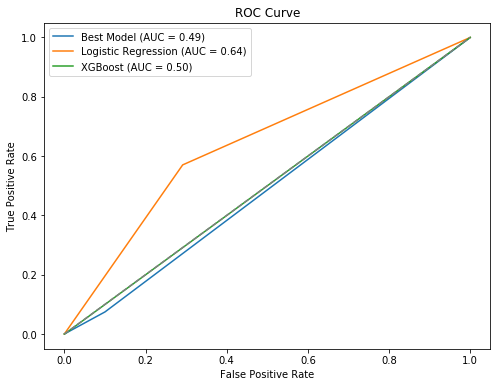

In [133]:
# Visualizing ROC curves for different models
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have made predictions using the best_model, best_model_log, and best_model_xgb on the X_test data
y_pred_best = best_model.predict(X_test)
y_pred_log = best_model_log.predict(X_test)
y_pred_xgb = best_model_xgb.predict(X_test)

# Assuming you have true labels y_test for each model
y_preds = [y_pred_best, y_pred_log, y_pred_xgb]
model_names = ['Best Model', 'Logistic Regression', 'XGBoost']

plt.figure(figsize=(8, 6))

for y_pred, name in zip(y_preds, model_names):
    # Calculating ROC AUC scores
    roc_auc = roc_auc_score(y_test, y_pred)
    # Calculating ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

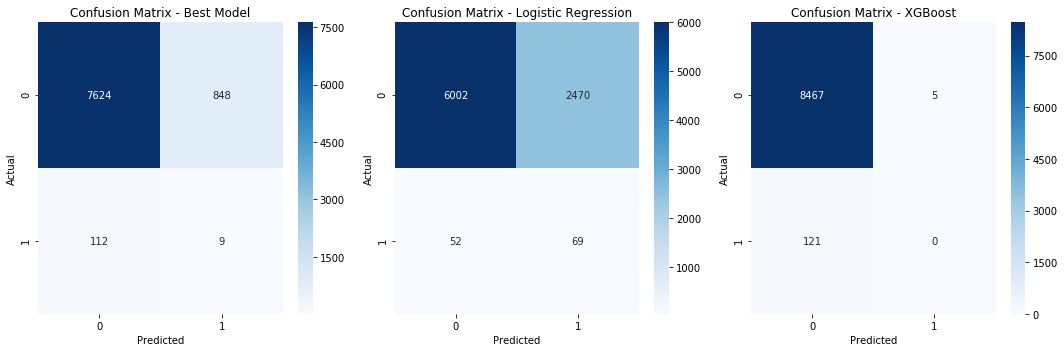

In [134]:
# Visualizing Confusion Matrix for different models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [best_model, best_model_log, best_model_xgb]
predictions = [y_pred_best, y_pred_log, y_pred_xgb]
model_names = ['Best Model', 'Logistic Regression', 'XGBoost']

plt.figure(figsize=(15, 5))
for i, (model, preds, name) in enumerate(zip(models, predictions, model_names), 1):
    plt.subplot(1, 3, i)
    conf_matrix = confusion_matrix(y_test, preds)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()

### 15. Conclusions <a name="15."></a>

While all models show strong accuracy, the Logistic Regression model stands out for it's balanced performance between accuracy and ROC AUC. It effectively identifies potential customers while minimizing the risk of false positives, making it a suitable choice for targeted marketing efforts. However, continuous monitoring and model refinement are crucial to ensure the highest accuracy in predicting customer behavior.

I also summarized conclusions that can support decision-making for the business:

- **Understand Customer Behavior:** We've discover into customers behaviour and uncover specific patterns. This helps for precise segmentation, understand diverse unique needs, and build specific strategies for marketing.


- **Predict and Prevent Problems:** Our models can predict potential issues like customers left or not responds well. This allow us take proactive steps by stop problems before they become significant. It's like have early 'warning system' that keep engagement level and customers satisfaction.


- **Optimize Resource Allocation:** Use our resources wisely. We can know where to invest marketing and sales efforts for the best results. Smart allocation ensure that every penny spent worth significant result, and impact to operational efficiency.


- **Continuous Improvement & Adaptability:** We continuously learn from new data and making strategies sharper. By keep the methods up-to-date, we stay in-sync with what customers wants. This flexibility allows to adapt on changing trends and keeps us ahead of the game.


- **Enhanced Customer Experience:** From the insights we can create personalized experience for customers. We know what they like, when they need assistance, and what products or services suit them best. This approach lead to 'happy customers' and improve loyalty, and loyal customers are key for long-term business.

### 16. Future Improvements <a name="16."></a>

- **Keep Updated Real-Time Data:** By incorporate real-time data, we can flow with the latest trend. This helps us respond fast and align our actions with what customers want right now.


- **Enchance Data Knowledge:** Encourage our team to understand and use data effectively. When feels comfortable with data, we can create workplace where decisions are made based on solid information.


- **Explore Advanced Analytics:** Techniques like predictive analytics, sentiment analysis, and mapping out customer journey reveal detailed information. These insights help us see hidden opportunities and potential challenges.


- **Collaboration is Key:** Insights from marketing can shape product development, and customer service data can guide marketing strategies. Combine data cross-department are essential, also lead to see bigger picture of our business.

In simple-terms, using data helps improve our business. We can make smart decisions to stay ahead of the competition.


### 17. Technical Improvements <a name="17."></a>

- Review Data Quality
- Feature Engineering
- Model Improvement
- Class Imbalance
- Domain Expert Consultation
- Regular Model Evaluation
- Explore External Factors
- Customer Segmentation
- Experimentation and Prototyping

By focusing on these areas, the business can develop reliable predictive models, provide solid foundation for data-driven decision-making, and improve overall business results.

### 18. Closure <a name="18."></a>

These conclusions and recommendations provide valuable insights to improve marketing and services strategy. Data-driven approcah helps us make informed decisions, it's lead to sustainable growth & maximized Business ROI (Return on Investment).

### 19. Acknowledgments <a name="19."></a>

- The Datasets used in this project's provided by Bertelsmann Arvato. Thankyou for their contribution for making this data available for analysis.

- Thankyou for Udacity "Data Science Nanodegree Program" which granted access to this dataset, also provided valuable knowledge and resources.

- This project's completed by Bernhard A. Alphama.